**Ségmentation d'images avec des approches variationnelles et des équations différentielles partielles.**

### NGUYEN Hai Vy - HOANG Van Hao - BERTIN Alexandre - BENZITOUNI Féthi

# 1) Introduction

Objectif segmenter l'arrière plan du premier plan selon les niveaux de gris



Nous nous concentrons sur le problème de segmentation binaire simple, connu sous le nom de problème de Mumford-Shah à deux phases et à constantes partielles.

Soit $I: x \in \Omega \mapsto[0 ; 255]$ représentant l'image en gris définie sur un domaine $\Omega \subset \mathbb{R}^{2}$.Nous souhaitons trouver un masque noté u définit par : $u: x \in \Omega \mapsto\{0 ; 1\}$. Ainsi l'image est découpé en deux parties.

On distingue $ S_u = \{x, u(x) = 1\} $ de $\Omega\backslash  S_u = \{x, u(x) = 0\}$

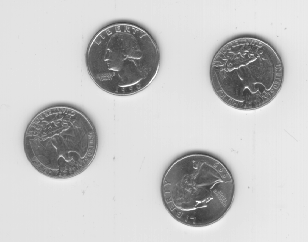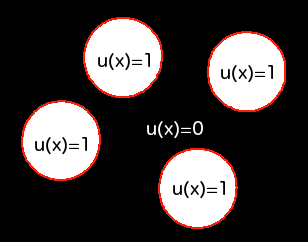

Le problème de ségmentation peut-être formalisé par le problème de minimisation suivant:
$$
\begin{aligned}
\left(u^{*}, c_{1}^{*}, c_{2}^{*}\right)=& \operatorname{argmin} \int_{\Omega}|D u| +\lambda \int_{\Omega}\left|I(x)-c_{1}\right|^{2} u(x) d x+\lambda \int_{\Omega}\left|I(x)-c_{2}\right|^{2}(1-u(x)) d x, \\
& {u \in\{0 ; 1\}^{|\Omega|}}\\
& c_{1} \in[0 ; 255] \\
& c_{2} \in[0 ; 255]
\end{aligned}
$$

Rappel sur la variation totale:

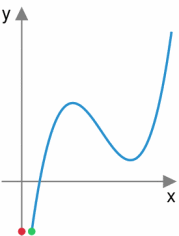

Dans le cas où u est continue on a :

$$
\begin{aligned}
\int_{\Omega}|D u| = \int_{\Omega}\|\nabla u(x)\|dx
\end{aligned}
$$

Pour u fixé nous avons deux solutions : 
$$
\begin{aligned}
c_{1}^{*} &=\frac{\int_{\Omega} I(x) u(x) d x}{\int_{\Omega} u(x) d x}, \\
c_{2}^{*} &=\frac{\int_{\Omega} I(x)(1-u(x)) d x}{\int_{\Omega}(1-u(x)) d x} .
\end{aligned}
$$
Cette approche est l'approche variationnelle.

Problème sur $u$ est :
- $u$ n'est pas défini dans un ensemble convexe
- La dérivation analytique du terme de régularisation donne le terme $\operatorname{div}\left(\frac{\nabla u}{\|\nabla u\|}\right)$. 

In [3]:
pip install celluloid

In [7]:
#### Download images
! wget . https://github.com/HaiVyNGUYEN/Image_Signal/raw/main/coin.png
! wget . https://github.com/HaiVyNGUYEN/Image_Signal/raw/main/croissant.jpg
! wget . https://github.com/HaiVyNGUYEN/Image_Signal/raw/main/table.png

--2022-01-16 08:12:02--  http://./
Resolving . (.)... failed: No address associated with hostname.
wget: unable to resolve host address ‘.’
--2022-01-16 08:12:02--  https://github.com/HaiVyNGUYEN/Image_Signal/raw/main/coin.png
Resolving github.com (github.com)... 13.114.40.48
Connecting to github.com (github.com)|13.114.40.48|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/HaiVyNGUYEN/Image_Signal/main/coin.png [following]
--2022-01-16 08:12:02--  https://raw.githubusercontent.com/HaiVyNGUYEN/Image_Signal/main/coin.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 131086 (128K) [image/png]
Saving to: ‘coin.png.1’

coin.png.1          100%[===================>] 128.01K  --.-KB/s    in 0.03s   

In [4]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from skimage import measure
from IPython.display import HTML # to show the animation in Jupyter
from celluloid import Camera # getting the camera
import numpy.linalg as npl

# 2) Reformulation du problème par Chan-Vese

Le problème binaire semble insolvable cependant il peut-être vue comme un problème d'altitude. Un peu comme si on demandait à une personne de segmenter les continents et les océans. Dont le niveau zéro représente, la frontière entre les deux objets.
La fonction est défini comme : $\phi: x \in \Omega \mapsto \mathbb{R}$

Avec $\phi(x)>0$ l'objet au premier plan, $\phi(x)=0$ la frontière et $\phi(x)<0$ l'arrière plan.
 



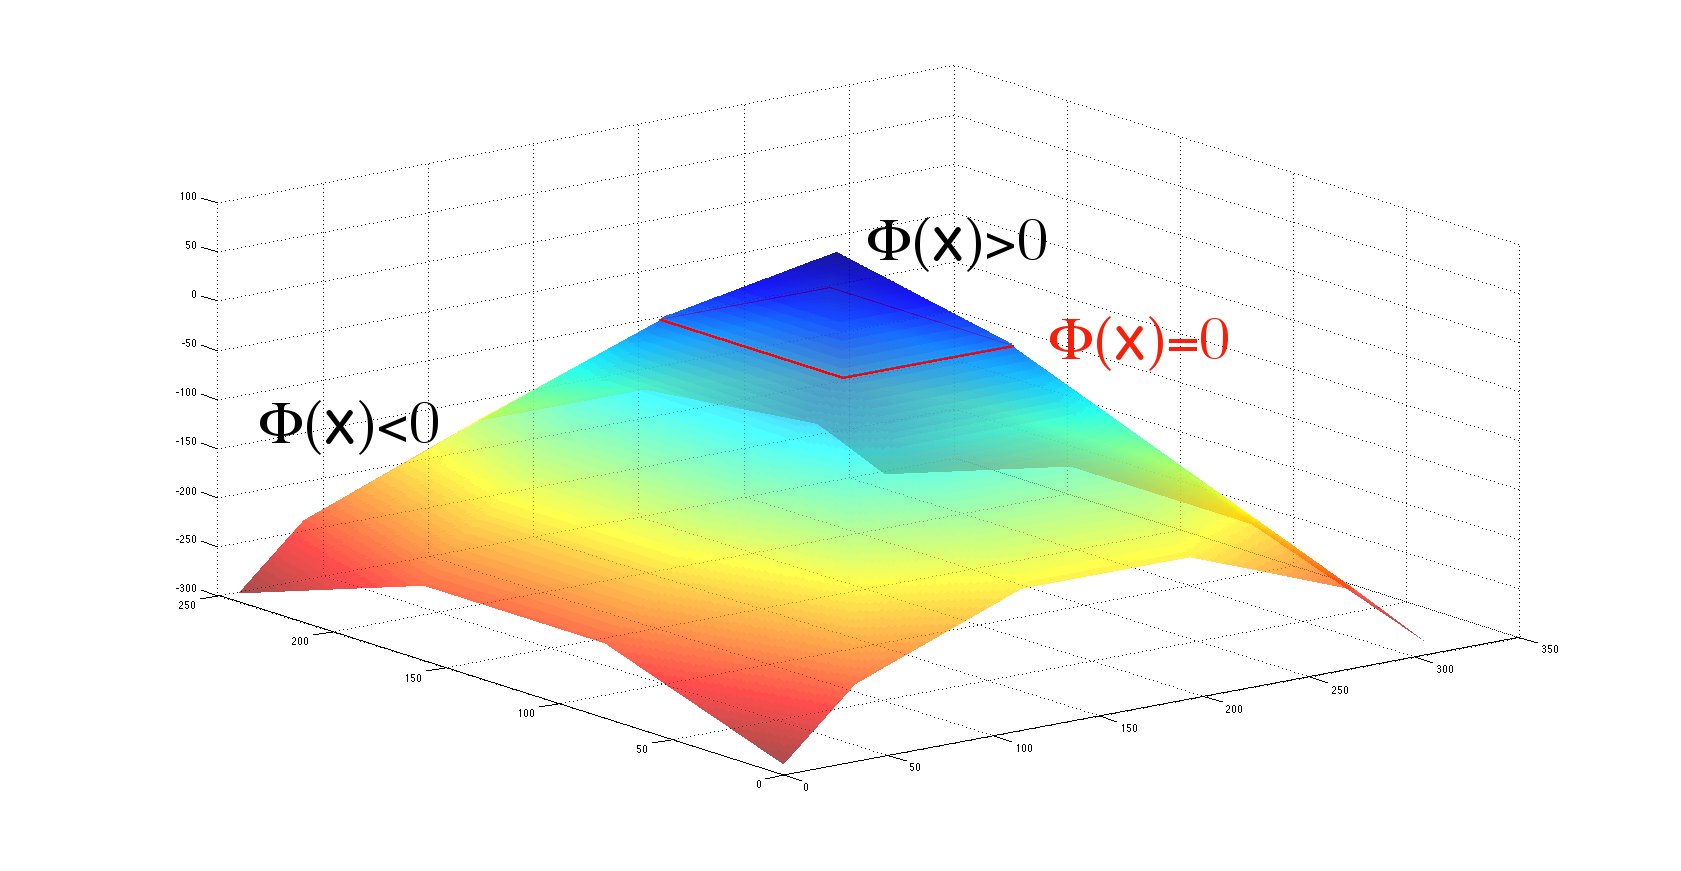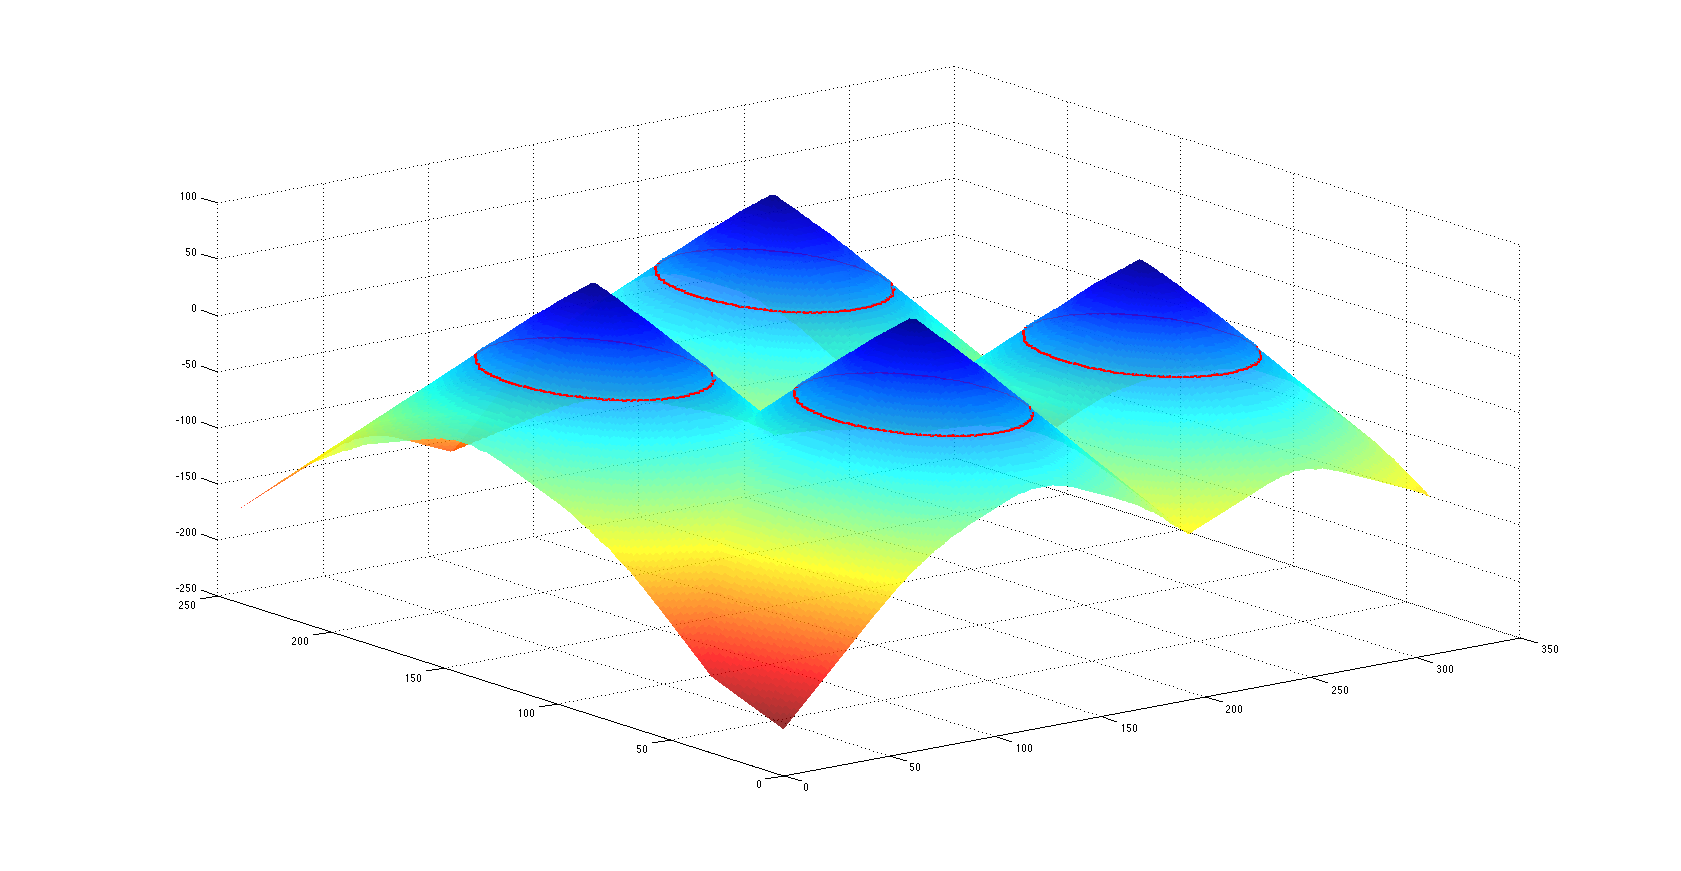

Pour rajouter, Heaviside fonction qui est défini tel que : 
$$
H(x) = \left\{ \begin{array}{cl}
1 & : \ x > 0 \\
0 & : \ x \le  0
\end{array} \right.
$$
Finalement $\forall x$
$$
u(x)=H(\phi(x)) \quad  
$$

Le nouveau problème de minimisation est le suivant : 
$$
\begin{gathered}
\left(\phi^{*}, c_{1}^{*}, c_{2}^{*}\right)=\underset{\phi \in \mathbb{R}^{|\Omega|}}{\operatorname{argmin}} \int_{\Omega}\|\nabla H(\phi(x))\| d x+\lambda \int_{\Omega}\left|I(x)-c_{1}\right|^{2} H(\phi(x)) d x+\lambda \int_{\Omega}\left|I(x)-c_{2}\right|^{2}(1-H(\phi(x))) d x . \\
c_{1} \in[0 ; 255] \\
c_{2} \in[0 ; 255]
\end{gathered}
$$

Pour résoudre le problème de différentiation de la fonction Heaviside, nous utilisons cette égalité. 
$$
\int_{\Omega}\|\nabla H(\phi(x))\| d x=\int_{\Omega} \delta(\phi)\|\nabla \phi(x)\| d x,
$$
$\delta$ est un dirac qui représente la dérivée de la fonction Heaviside. 

$\|\nabla \phi\|$ n'est pas forcément différentiable ainsi nous devons poser :
$$
\|\nabla \phi\|_{\epsilon}=\sqrt{\phi_{x}^{2}+\phi_{y}^{2}+\epsilon^{2}}, \text { avec } 0<\epsilon \leq 1 .
$$
Cela empêche que $\|\nabla \phi\|_{\epsilon}$ soit nulle pour certaines valeurs de $\phi$.

Mais aussi la fonction Heaviside et la fonction dirac doivent être de classe $C^{2}$. Or ce n'est pas le cas, on passe par des autres fonctions sont notées
$$
H_{\eta}(\phi(x))=\frac{1+\frac{2\arctan\frac{\phi(x)}{\eta}}{\pi}}{2}
$$
et, $\eta >0.$

Heavyside_eta quand eta change

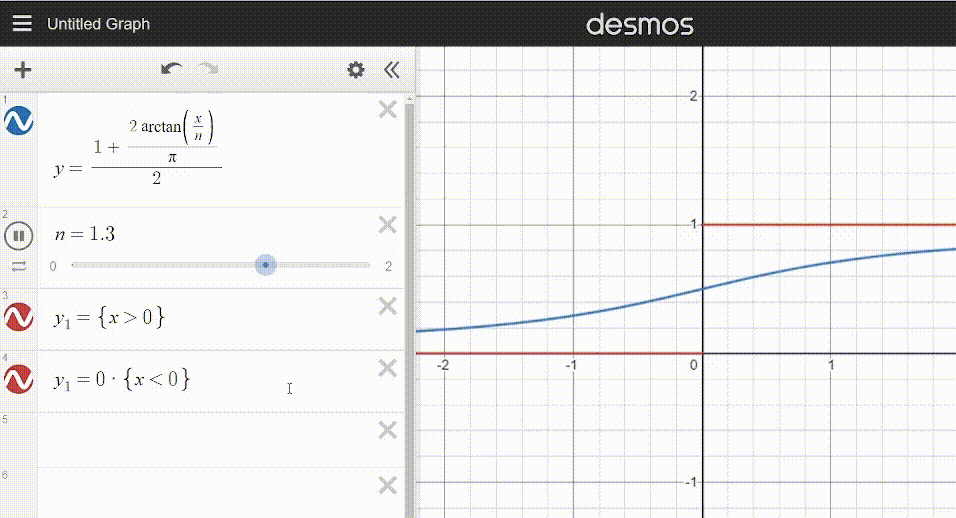

On calcule aussi :
$$
|\phi(x)|=\min _{y \in \partial S_u}|x-y|
$$
Pour avoir une representation exacte de la longeur des contours,la condition $\|\nabla \phi\|=1$ doit être vérifiée en points $x$ tels que $\phi(x)=0$

On estime itérativement $c_{1}^{*}$ et $c_{2}^{*}$ : 
$$
\begin{aligned}
c_{1}^{k+1} &=\frac{\int_{\Omega} I(x) H_{\eta}\left(\phi^{k}(x)\right) d x}{\int_{\Omega} H_{\eta}\left(\phi^{k}(x)\right) d x}, \\
c_{2}^{k+1} &=\frac{\int_{\Omega} I(x)\left(1-H_{\eta}\left(\phi^{k}(x)\right)\right) d x}{\int_{\Omega}\left(1-H_{\eta}\left(\phi^{k}(x)\right)\right) d x} .
\end{aligned}
$$ (2.4)


Après toutes ces propositions, nous pouvons calculer $\phi^{*}$ à partir d'une descente de gradient.
$$
\phi^{k+1}=\phi^{k}+\tau \delta_{\eta}\left(\phi^{k}\right)\left[\operatorname{div}\left(\frac{\nabla \phi^{k}}{\left\|\nabla \phi^{k}\right\|_{\epsilon}}\right)-\lambda\left(I-c_{1}^{k+1}\right)^{2}+\lambda\left(I-c_{2}^{k+1}\right)^{2}\right] .
$$ (2.5)

$\tau$ est le pas, on peut accélérer la descente par une suite de pas défini tel que :
$$\tau^{k}=\frac{1}{2\max _{x}\left|\delta_{\eta}\left(\phi^{k}\right)(x)\left[\operatorname{div}\left(\frac{\nabla \phi^{k}}{\left\|\nabla \phi^{k}\right\|_{\epsilon}}\right)(x)-\lambda\left(I(x)-c_{1}^{k+1}\right)^{2}+\lambda\left(I(x)-c_{2}^{k+1}\right)^{2}\right]\right|}$$

Pseudo-code:
- Initialize number of iterations N
- Get an initial region of interest u(x) and define a signed function $\phi(x)$ from it
- For iteration in 1...N:
 + Update of color constants $c_1^{k+1}$ and $c_2^{k+1}$ with (2.4)
 + Update of $\phi^{k+1}$ with (2.5)
 + Every n iterations, update of $\phi^{k+1}$ as a signed distance to its 0 level.


In [9]:
#### fast_matching.m
def fast_marching(mask):
    #Compute an approximation of the distance D of pixels
    #such that mask(x)=0 to the region mask=1
    nbc, nbl=np.shape(mask)[:2]
    D=np.ones((nbc,nbl))*1000000.0
    for i in range(nbc):
        for j in range(nbl):
            if(mask[i,j]==1):
                D[i,j]=0
    for j in range(nbl):
        for i in range(nbc):
            if(i>0):
                if(D[i-1,j]+1.0<D[i,j]):
                    D[i,j]=D[i-1,j]+1.0
            if(j>0):
                if(D[i,j-1]+1.0<D[i,j]):
                    D[i,j]=D[i,j-1]+1.0
            if(i>0 and j>0):
                if(D[i-1,j-1]+np.sqrt(2.0)<D[i,j]):
                    D[i,j]=D[i-1,j-1]+np.sqrt(2.0)
            if(i<nbc-1 and j>0):
                if(D[i+1,j-1]+np.sqrt(2.0)<D[i,j]):
                    D[i,j]=D[i+1,j-1]+np.sqrt(2.0)
    for i in np.arange(nbc-1)[::-1]:
        if(D[i+1,j]+1.0<D[i,j]):
            D[i,j]=D[i+1,j]+1.0
    for j in np.arange(nbl)[::-1]:
        for i in np.arange(nbc)[::-1]:
            if(i<nbc-1):
                if(D[i+1,j]+1.0<D[i,j]):
                    D[i,j]=D[i+1,j]+1.0
            if(j<nbl-1):
                if(D[i,j+1]+1.0<D[i,j]):
                    D[i,j]=D[i,j+1]+1.0
            if(i<nbc-1 and j<nbl-1):
                if(D[i+1,j+1]+np.sqrt(2.0)<D[i,j]):
                    D[i,j]=D[i+1,j+1]+np.sqrt(2.0)
            if(i>0 and j<nbl-1):
                if(D[i-1,j+1]+np.sqrt(2.0)<D[i,j]):
                    D[i,j]=D[i-1,j+1]+np.sqrt(2.0)
    for i in range(1,nbc): 
        if(D[i-1,j]+1.0<D[i,j]):
            D[i,j]=D[i-1,j]+1.0
    return D
def delta_eta(phi,eta):
    M = 1./((1 + (phi/eta)**2)*eta*np.pi)
    return M
def div(px,py):
    m,n=np.shape(px)
    M=np.zeros((m,n))
    Mx=np.copy(M)
    My=np.copy(M)
    Mx[1:m-1,:]=px[1:m-1,:]-px[:m-2,:]
    Mx[0,:]=px[0,:]
    Mx[-1,:]=-px[-2,:]
    My[:,1:n-1]=py[:,1:n-1]-py[:,:n-2]
    My[:,0]=py[:,0]
    My[:,-1]=-py[:,-2]
    M=Mx+My
    return M
def gradx(I):
    m,n=np.shape(I)
    M=np.zeros((m,n))
    M[:-1,:]=I[1:,:]-I[:-1,:]
    return M
def grady(I):
    m,n=np.shape(I)
    M=np.zeros((m,n))
    M[:,:-1]=I[:,1:]-I[:,:-1]
    return M  
def Heavyside_eta(phi,eta):
    M = (1.+2.*np.arctan(phi/eta)/np.pi)/2.
    return M
def signed_distance_from_mask(mask):
    Dm=fast_marching(mask)    ### compute the distance to the region mask=1
    Dp=fast_marching(1-mask)  ### compute the distance to the region mask=0
    phi=Dp-Dm
    return phi
def Heavyside(phi):
    return (phi>0).astype('int32')
def compute_energy_smooth(im,u,c1,c2,lamb):
  Ic1=(im-c1)**2
  Ic2=(im-c2)**2
  energy=0
  a,b=np.shape(u)
  grad_x_u=gradx(u)
  grad_y_u=grady(u)
  for i in range(len(a)):
    for j in range(len(b)):
      energy=energy+np.sqrt(gradx(u)[i,j]**2+grady(u)[i,j]**2)+lamb*u[i,j]*Ic1[i,j]+Ic2[i,j]*(1-u[i,j])*lamb
    return energy

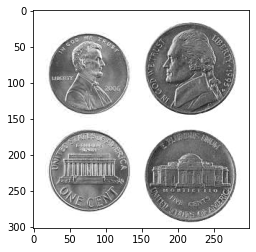

In [14]:
img = mpimg.imread('coin.png')
plt.imshow(img)
img=np.array(img)
im=np.round(img[25:-6,2:,0]*255/(np.max(img)-np.min(img))).astype('int64')
plt.imshow(im,cmap='gray')

L'image ci-dessus comporte un arrière plan et 4 pièces qui représente l'objet premier plan.

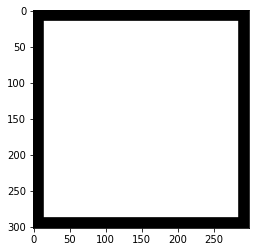

In [11]:
mask0=np.zeros_like(im)
mask0[15:-15,15:-15]=1
plt.imshow(mask0,cmap='gray')

Un premier masque qui prend en compte quasiment toute l'image

In [12]:
def iteration(Im,mask0,Nmax=1000,eta=1,eps=1,lamb=1e-4,threshold=1,n=10):
    phi=signed_distance_from_mask(mask0)
    cond=1+threshold
    Niter=0
    list_mask=[]
    list_phi=[]
    while Niter<Nmax:# and cond > threshold:
        phi0=np.copy(phi)
        
        if Niter%n==0:
            mask=Heavyside(phi)
            phi=signed_distance_from_mask(mask)
            list_mask+=[mask]
            list_phi+=[phi]
            contours = measure.find_contours(mask,0)
        c1=np.sum(Im*Heavyside_eta(phi,eta))/np.sum(Heavyside_eta(phi,eta))
        c2=np.sum(Im*(1-Heavyside_eta(phi,eta)))/np.sum(1-Heavyside_eta(phi,eta))
        gradx_phi=gradx(phi)
        grady_phi=grady(phi)
        reg=np.sqrt(np.sum(gradx_phi**2)+np.sum(grady_phi**2)+eps)
        expression=delta_eta(phi,eta)*(div(gradx_phi/reg,grady_phi/reg)-lamb*(Im-c1)**2+lamb*(Im-c2)**2)
        tho=1/(2*np.max(np.abs(expression)))
        phi+=tho*expression
        cond=np.sum(Heavyside(phi)-Heavyside(phi0))
        Niter+=1
    return list_phi,list_mask

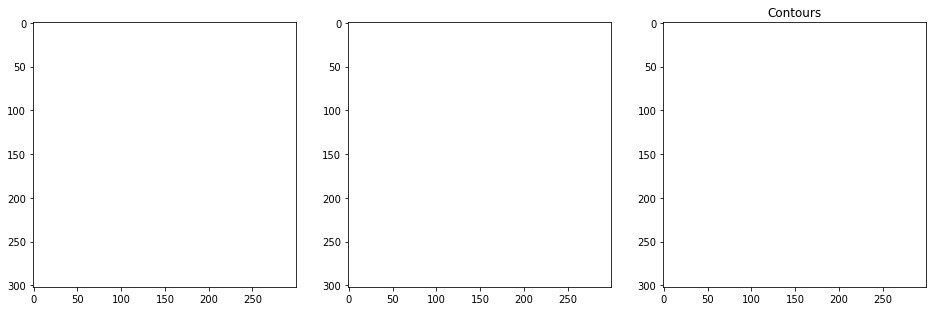

In [13]:
list_phi,list_mask=iteration(im,mask0)
fig, ax = plt.subplots(1, 3,figsize=(16, 6))
camera = Camera(fig)# the camera gets the fig we'll plot
for i,(phi,mask) in enumerate(zip(list_phi,list_mask)):
    contours = measure.find_contours(mask,0)
    ax[0].imshow(phi,cmap='jet')
    ax[1].imshow(mask,cmap='gray')
    ax[2].imshow(im,cmap='gray')
    for contour in contours:
        ax[2].plot(contour[:, 1], contour[:, 0], linewidth=1.5,color='red')
    #ax[0].set_title('Mask')
    ax[2].set_title("Contours")
    #fig.suptitle('Iteration '+str(10*(i+1)),fontsize=20)
    ax[0].text(0.7, 1.01, 'Iteration '+str(10*(i+1)), transform=ax[0].transAxes) 
    camera.snap() # the camera takes a snapshot of the plot
animation = camera.animate() # animation ready
HTML(animation.to_html5_video()) # displaying the animation 

### Optional

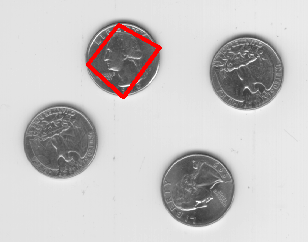
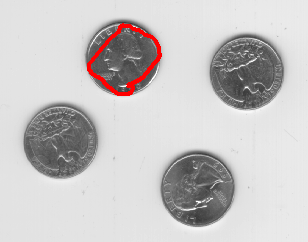
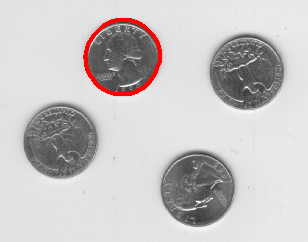

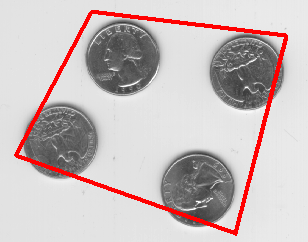
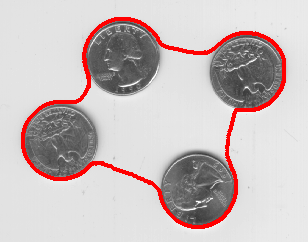
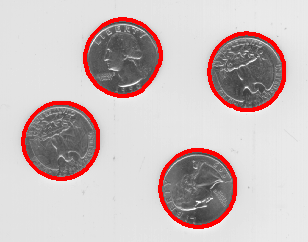

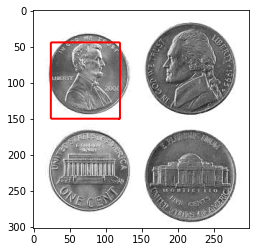

In [15]:
#### Choisir un autre masque initial pour voir comment ca marche
mask1=np.zeros_like(im)
mask1[45:150,25:120]=1
contours = measure.find_contours(mask1,0)
plt.imshow(im, cmap=plt.cm.gray)
for contour in contours:
    plt.plot(contour[:, 1], contour[:, 0], linewidth=2,color='red')
plt.show()

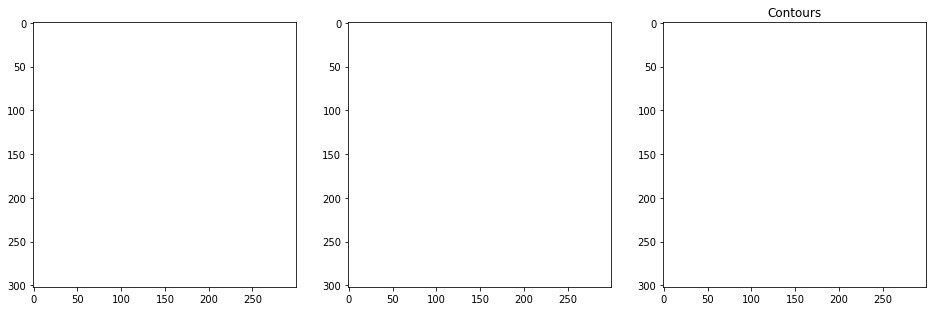

In [16]:
list_phi1,list_mask1=iteration(im,mask1,700)
fig, ax = plt.subplots(1, 3,figsize=(16, 6))
camera = Camera(fig)# the camera gets the fig we'll plot
for i,(phi,mask) in enumerate(zip(list_phi1,list_mask1)):
    contours = measure.find_contours(mask,0)
    ax[0].imshow(phi,cmap='jet')
    ax[1].imshow(mask,cmap='gray')
    ax[2].imshow(im,cmap='gray')
    for contour in contours:
        ax[2].plot(contour[:, 1], contour[:, 0], linewidth=1.5,color='red')
    #ax[0].set_title('Mask')
    ax[2].set_title("Contours")
    #fig.suptitle('Iteration '+str(10*(i+1)),fontsize=20)
    ax[0].text(0.7, 1.01, 'Iteration '+str(10*(i+1)), transform=ax[0].transAxes) 
    camera.snap() # the camera takes a snapshot of the plot
animation = camera.animate() # animation ready
HTML(animation.to_html5_video()) # displaying the animation 

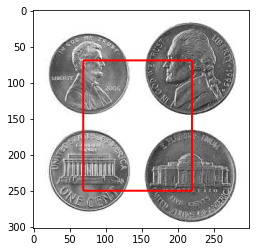

In [17]:
### Encore un autre masque initial
mask2=np.zeros_like(im)
mask2[70:250,70:220]=1
contours = measure.find_contours(mask2,0)
plt.imshow(im, cmap=plt.cm.gray)
for contour in contours:
    plt.plot(contour[:, 1], contour[:, 0], linewidth=2,color='red')
plt.show()

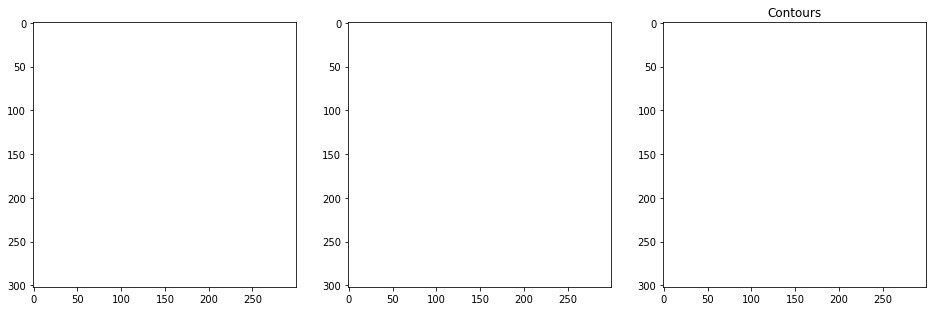

In [ ]:
list_phi2,list_mask2=iteration(im,mask2)
fig, ax = plt.subplots(1, 3,figsize=(16, 6))
camera = Camera(fig)# the camera gets the fig we'll plot
for i,(phi,mask) in enumerate(zip(list_phi2,list_mask2)):
    contours = measure.find_contours(mask,0)
    ax[0].imshow(phi,cmap='jet')
    ax[1].imshow(mask,cmap='gray')
    ax[2].imshow(im,cmap='gray')
    for contour in contours:
        ax[2].plot(contour[:, 1], contour[:, 0], linewidth=1.5,color='red')
    #ax[0].set_title('Mask')
    ax[2].set_title("Contours")
    #fig.suptitle('Iteration '+str(10*(i+1)),fontsize=20)
    ax[0].text(0.7, 1.01, 'Iteration '+str(10*(i+1)), transform=ax[0].transAxes) 
    camera.snap() # the camera takes a snapshot of the plot
animation = camera.animate() # animation ready
HTML(animation.to_html5_video()) # displaying the animation 

#### Second Object: Table
### Voici le lien vers les videos que nous avons effectué si vous ne voulez pas perdre trop de temps de tourner les codes
https://drive.google.com/drive/folders/12t2GsgjCL3cXhG47q0sfwKsmf-FBu7se?usp=sharing

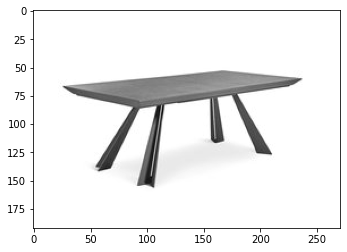

In [36]:
img2= np.array(mpimg.imread('table.png'))[:,:,0]
img2=np.round(img2*255/(np.max(img2)-np.min(img2))).astype('int64')
plt.imshow(img2,cmap='gray')
plt.show()

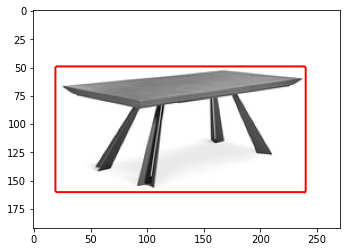

In [37]:
mask_table=np.zeros_like(img2)
mask_table[50:160,20:240]=1
contours = measure.find_contours(mask_table,0)
plt.imshow(img2, cmap=plt.cm.gray)
for contour in contours:
    plt.plot(contour[:, 1], contour[:, 0], linewidth=2,color='red')
plt.show()

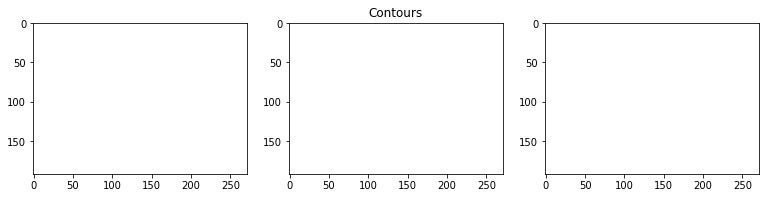

In [41]:
phi2,list_mask2=iteration(img2,mask_table,1000)
fig, ax = plt.subplots(1, 3,figsize=(13, 6))
camera = Camera(fig)# the camera gets the fig we'll plot
for i,(phi,mask) in enumerate(zip(phi2,list_mask2)):
    contours = measure.find_contours(mask,0)
    ax[0].imshow(phi,cmap='jet')
    ax[1].imshow(mask,cmap='gray')
    ax[2].imshow(img2,cmap='gray')
    for contour in contours:
        ax[2].plot(contour[:, 1], contour[:, 0], linewidth=1.5,color='red')
    #ax[0].set_title('Mask')
    ax[1].set_title("Contours")
    #fig.suptitle('Iteration '+str(10*(i+1)),fontsize=20)
    ax[0].text(0.7, 1.01, 'Iteration '+str(10*(i+1)), transform=ax[0].transAxes) 
    camera.snap() # the camera takes a snapshot of the plot
animation = camera.animate() # animation ready
HTML(animation.to_html5_video()) # displaying the animation 

# 3) Chan, Esedoglu and Nikolova convex formulation

Une autre approche présenté par Chan, Esedoglu et Nikolova consiste à laisser 
$u(x)$ prendre des valeurs continue dans $[0 ; 1]$. Ainsi le problème devient convexe en $u$, défini sur l'ensemble convexe $\mathcal{A}:=\{u:$ $x \in \Omega \mapsto[0 ; 1]\}:$

$$
\begin{aligned}
\left(u^{*}, c_{1}^{*}, c_{2}^{*}\right)=& \underset{u \in[0 ; 1]^{|\Omega|}}{\operatorname{argmin}} \\
& c_{1} \in[0 ; 255] \\
& c_{2} \in[0 ; 255]
\end{aligned}\|\nabla u\|_{\epsilon}+\lambda \int_{\Omega}\left|I(x)-c_{1}\right|^{2} u(x) d x+\lambda \int_{\Omega}\left|I(x)-c_{2}\right|^{2}(1-u(x)) d x,
$$

Ainsi on obtient la solution globale optimale $u^{*}$ calculé par descente de gradient projeté:

$$
u^{k+1}=P_{\mathcal{A}}\left(u^{k}+\tau\left(\operatorname{div}\left(\frac{\nabla u^{k}}{\left\|\nabla u^{k}\right\|_{\epsilon}}\right)-\lambda\left(I-c_{1}\right)^{2}+\lambda\left(I-c_{2}\right)^{2}\right)\right),
$$

In [30]:
def projete(u):
  a,b=np.shape(u)
  for i in range(a):
    for j in range(b):
      u[i,j]=min(max(u[i,j],0),1)
  return u

def iteration_3(Im,mask0,Nmax=200,eta=1,eps=1,lamb=1e-4,threshold=0.5,n=2,c1=110,c2=227,tho=0.1):
    u=signed_distance_from_mask(mask0)
    cond=1+threshold
    Niter=0
    list_mask=[]
    list_u=[]
    Ic1=(Im-c1)**2
    Ic2=(Im-c2)**2
    while Niter<Nmax:
        u0=np.copy(u)
        
        if Niter%n==0:

            mask=Heavyside(u-threshold)
            u=signed_distance_from_mask(mask)
            list_mask+=[mask]
            list_u+=[u]
            contours = measure.find_contours(mask,0)

        gradx_u=gradx(u)
        grady_u=grady(u)
        reg=np.sqrt(np.sum(gradx_u**2)+np.sum(grady_u**2)+eps)
        expression=tho*(div(gradx_u/reg,grady_u/reg)-lamb*Ic1+lamb*Ic2)
        u=projete(u0+tho*expression)
        Niter+=1
    return list_u,list_mask

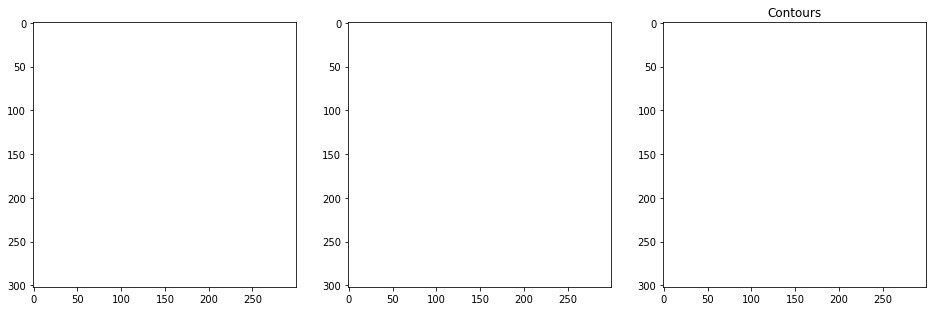

In [29]:
phi3,list_mask3=iteration_3(im,mask0)
fig, ax = plt.subplots(1, 3,figsize=(16, 6))
camera = Camera(fig)# the camera gets the fig we'll plot
for i,(phi,mask) in enumerate(zip(phi3,list_mask3)):
    contours = measure.find_contours(mask,0)
    ax[0].imshow(phi,cmap='jet')
    ax[1].imshow(mask,cmap='gray')
    ax[2].imshow(im,cmap='gray')
    for contour in contours:
        ax[2].plot(contour[:, 1], contour[:, 0], linewidth=1.5,color='red')
    #ax[0].set_title('Mask')
    ax[2].set_title("Contours")
    #fig.suptitle('Iteration '+str(10*(i+1)),fontsize=20)
    ax[0].text(0.7, 1.01, 'Iteration '+str(10*(i+1)), transform=ax[0].transAxes) 
    camera.snap() # the camera takes a snapshot of the plot
animation = camera.animate() # animation ready
HTML(animation.to_html5_video()) # displaying the animation 

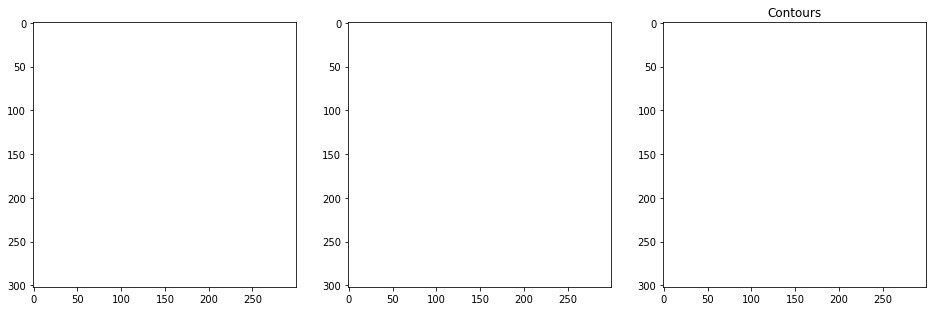

In [ ]:
fig, ax = plt.subplots(1, 3,figsize=(16, 6))
camera = Camera(fig)# the camera gets the fig we'll plot
for i,(phi,mask) in enumerate(zip(phi3,list_mask3)):
    contours = measure.find_contours(mask,0)
    ax[0].imshow(phi,cmap='jet')
    ax[1].imshow(mask,cmap='gray')
    ax[2].imshow(im,cmap='gray')
    for contour in contours:
        ax[2].plot(contour[:, 1], contour[:, 0], linewidth=1.5,color='red')
    #ax[0].set_title('Mask')
    ax[2].set_title("Contours")
    #fig.suptitle('Iteration '+str(10*(i+1)),fontsize=20)
    ax[0].text(0.7, 1.01, 'Iteration '+str(10*(i+1)), transform=ax[0].transAxes) 
    camera.snap() # the camera takes a snapshot of the plot
animation = camera.animate() # animation ready
HTML(animation.to_html5_video()) # displaying the animation 

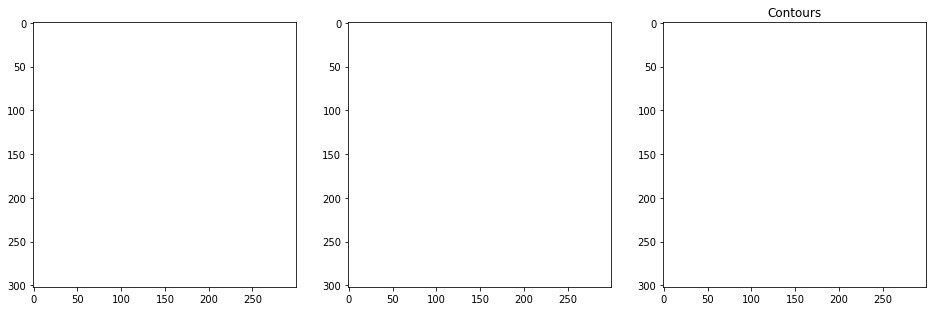

In [ ]:
phi3_2,list_mask3_2=iteration_3(im,mask0,Nmax=500,threshold=0.2)
fig, ax = plt.subplots(1, 3,figsize=(16, 6))
camera = Camera(fig)# the camera gets the fig we'll plot
for i,(phi,mask) in enumerate(zip(phi3_2,list_mask3_2)):
    contours = measure.find_contours(mask,0)
    ax[0].imshow(phi,cmap='jet')
    ax[1].imshow(mask,cmap='gray')
    ax[2].imshow(im,cmap='gray')
    for contour in contours:
        ax[2].plot(contour[:, 1], contour[:, 0], linewidth=1.5,color='red')
    #ax[0].set_title('Mask')
    ax[2].set_title("Contours")
    #fig.suptitle('Iteration '+str(10*(i+1)),fontsize=20)
    ax[0].text(0.7, 1.01, 'Iteration '+str(10*(i+1)), transform=ax[0].transAxes) 
    camera.snap() # the camera takes a snapshot of the plot
animation = camera.animate() # animation ready
HTML(animation.to_html5_video()) # displaying the animation 

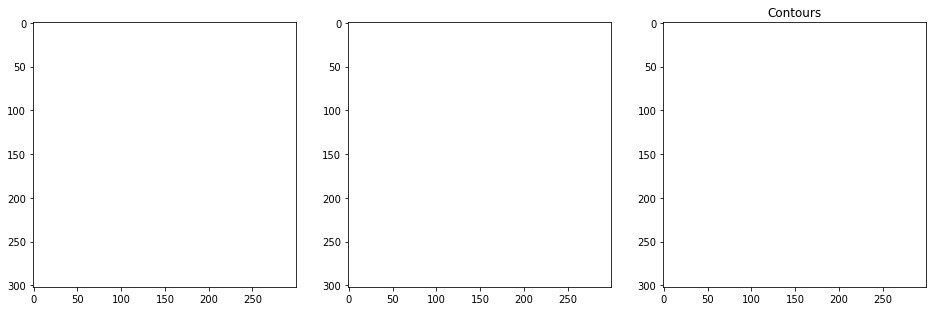

In [ ]:
phi3_8,list_mask3_8=iteration_3(im,mask0,Nmax=500,threshold=0.8)
fig, ax = plt.subplots(1, 3,figsize=(16, 6))
camera = Camera(fig)# the camera gets the fig we'll plot
for i,(phi,mask) in enumerate(zip(phi3_8,list_mask3_8)):
    contours = measure.find_contours(mask,0)
    ax[0].imshow(phi,cmap='jet')
    ax[1].imshow(mask,cmap='gray')
    ax[2].imshow(im,cmap='gray')
    for contour in contours:
        ax[2].plot(contour[:, 1], contour[:, 0], linewidth=1.5,color='red')
    #ax[0].set_title('Mask')
    ax[2].set_title("Contours")
    #fig.suptitle('Iteration '+str(10*(i+1)),fontsize=20)
    ax[0].text(0.7, 1.01, 'Iteration '+str(10*(i+1)), transform=ax[0].transAxes) 
    camera.snap() # the camera takes a snapshot of the plot
animation = camera.animate() # animation ready
HTML(animation.to_html5_video()) # displaying the animation 

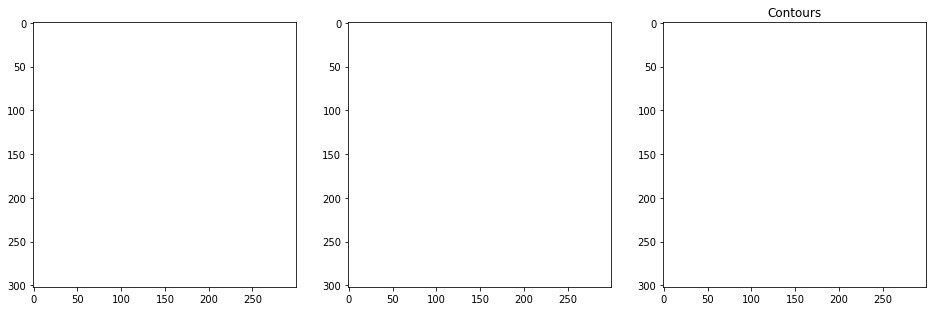

In [ ]:
phi4,list_mask4=iteration_3(im,mask2)
fig, ax = plt.subplots(1, 3,figsize=(16, 6))
camera = Camera(fig)# the camera gets the fig we'll plot
for i,(phi,mask) in enumerate(zip(phi4,list_mask4)):
    contours = measure.find_contours(mask,0)
    ax[0].imshow(phi,cmap='jet')
    ax[1].imshow(mask,cmap='gray')
    ax[2].imshow(im,cmap='gray')
    for contour in contours:
        ax[2].plot(contour[:, 1], contour[:, 0], linewidth=1.5,color='red')
    #ax[0].set_title('Mask')
    ax[2].set_title("Contours")
    #fig.suptitle('Iteration '+str(10*(i+1)),fontsize=20)
    ax[0].text(0.7, 1.01, 'Iteration '+str(10*(i+1)), transform=ax[0].transAxes) 
    camera.snap() # the camera takes a snapshot of the plot
animation = camera.animate() # animation ready
HTML(animation.to_html5_video()) # displaying the animation 

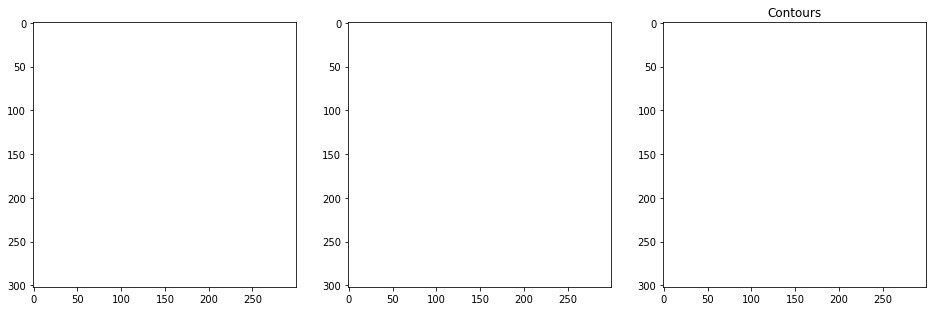

In [ ]:
phi5,list_mask5=iteration_3(im,mask1)
fig, ax = plt.subplots(1, 3,figsize=(16, 6))
camera = Camera(fig)# the camera gets the fig we'll plot
for i,(phi,mask) in enumerate(zip(phi5,list_mask5)):
    contours = measure.find_contours(mask,0)
    ax[0].imshow(phi,cmap='jet')
    ax[1].imshow(mask,cmap='gray')
    ax[2].imshow(im,cmap='gray')
    for contour in contours:
        ax[2].plot(contour[:, 1], contour[:, 0], linewidth=1.5,color='red')
    #ax[0].set_title('Mask')
    ax[2].set_title("Contours")
    #fig.suptitle('Iteration '+str(10*(i+1)),fontsize=20)
    ax[0].text(0.7, 1.01, 'Iteration '+str(10*(i+1)), transform=ax[0].transAxes) 
    camera.snap() # the camera takes a snapshot of the plot
animation = camera.animate() # animation ready
HTML(animation.to_html5_video()) # displaying the animation 

# 4) Dual Formulation of the Total Variation


La formulation précédente implique toujours la régularisation $\|\nabla u\|_{\epsilon}$ de la variation totale, défini pour toute fonction de $u$ prenant des valeurs continue dans $[0 ; 1]$. Une idée est de considérer la formulation dual de la variation totale:

$$
\int_{\Omega}|D u|=\sup _{\mathbf{z} \in \mathcal{B}} \int_{\Omega} u d i v(\mathbf{z}) d x,
$$

La variable dual $\mathbf{z}$ est un vecteur sur le cercle unité avec $\mathcal{B}=\left\{\mathbf{z}=\left(z_{1}, z_{2}\right),|\mathbf{z}|=\right.$ $\left.\sqrt{z_{1}^{2}+z_{2}^{2}} \leq 1\right\}$. Si $u$ est régulier on a $\int_{\Omega}|D u|=\int_{\Omega}\|\nabla u\|=\sup _{\mathbf{z} \in \mathcal{B}} \int_{\Omega} \nabla u \cdot \mathbf{z} d x$. 

Cette formulation dual permet de représenter avec $\mathrm{z}$ la direction du vecteur unité de $\nabla u$ et est le point clé pour gérer la non différentiabilité quand $\|\nabla u\|=0$.

Cela est illustré dans la figure qui suit, où l'on a que $\|\nabla u\|=\max _{\mathbf{z} \in \mathcal{B}}\langle\nabla u, \mathbf{z}\rangle$. Comme $\langle\nabla u, \mathbf{z}\rangle=\|\nabla u\| \cdot\|z\| \cos (\nabla u, \mathbf{z})$, le maximum est atteint pour $\mathbf{z}=\nabla u /\|\nabla u\| \in \mathcal{B}$, so that $\|z\|=1$ and $\cos (\nabla u, \mathbf{z})=1$.

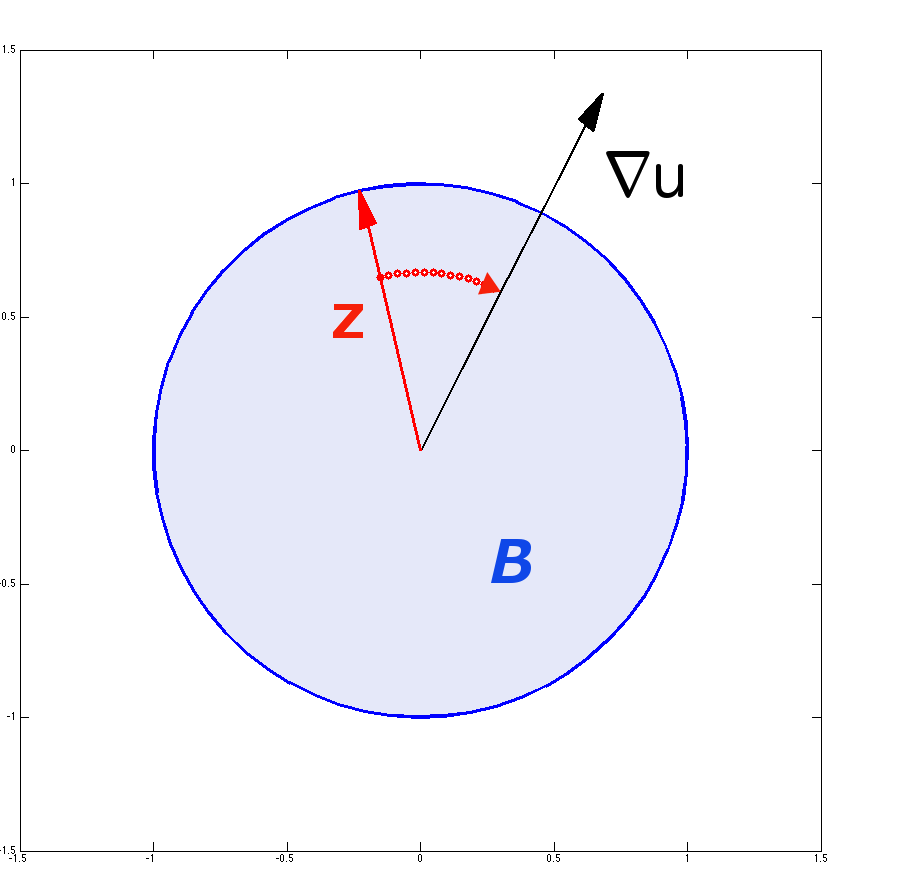

En fixant $c_{1}$ et $c_{2}$, le problème initial devient:

$$
\left(u^{*}, \mathbf{z}^{*}\right)=\underset{u \in \mathcal{A}}{\operatorname{argmin}} \underset{\mathbf{z} \in \mathcal{B}}{\operatorname{argmax}} J(u, z),
$$

Avec $J$ continuement différentiable dans $(u, \mathbf{z})$ et défini comme:

$$
J(u, \mathbf{z})=\int_{\Omega} u d i v(\mathbf{z}) d x+\lambda \int_{\Omega}\left|I(x)-c_{1}\right|^{2} u(x) d x+\lambda \int_{\Omega}\left|I(x)-c_{2}\right|^{2}(1-u(x)) d x .
$$

Algorithme:

$$
\left\{\begin{array}{l}
\mathbf{z}^{k+1}=P_{\mathcal{B}}\left(\mathbf{z}^{k}+\sigma \nabla u^{k}\right) \\
u^{k+1}=P_{\mathcal{A}}\left(u^{k}+\tau\left(\operatorname{div}\left(\mathbf{z}^{k+1}\right)-\lambda\left(I-c_{1}\right)^{2}+\lambda\left(I-c_{2}\right)^{2}\right)\right),
\end{array}\right.
$$

où la projection sur le convexe $\mathcal{B}$ est donné par :

$$
P_{\mathcal{B}}(\mathbf{z})=\left\{\begin{array}{cl}
\mathbf{z} & \text { if }\|\mathbf{z}\| \leq 1 \\
\frac{\mathbf{z}}{\|\mathbf{z}\|} & \text { sinon }
\end{array}\right.
$$

In [ ]:
def projete_a(u):
  a,b=np.shape(u)
  for i in range(a):
    for j in range(b):
      u[i,j]=min(max(u[i,j],0),1)
  return u

def projete_b(z):
  if npl.norm(z)>1:
    z = z/npl.norm(z)
  return z


def iteration_4(Im,mask0,Nmax=200,eta=1,eps=1,lamb=1e-4,threshold=0.5,n=10,c1=110,c2=227,tho=0.25,sigma=0.5):
    u=signed_distance_from_mask(mask0)
    z_x=gradx(u).copy()
    z_y=grady(u).copy()
    cond=1+threshold
    Niter=0
    list_mask=[]
    list_u=[]
    Ic1=(Im-c1)**2
    Ic2=(Im-c2)**2
    while Niter<Nmax:
        u0=np.copy(u)
        if (Niter%n==0):
            mask=Heavyside(u-threshold)
            u=signed_distance_from_mask(mask)
            list_mask+=[mask]
            list_u+=[u]
            contours = measure.find_contours(mask,0)
        gradx_u=gradx(u)
        grady_u=grady(u)
        z_x=projete_b(z_x+sigma*gradx_u)
        z_y=projete_b(z_y+sigma*grady_u)
       
        u=projete_a(u+tho*(div(z_x,z_y)-lamb*Ic1+lamb*Ic2))
        Niter+=1
    return list_u,list_mask

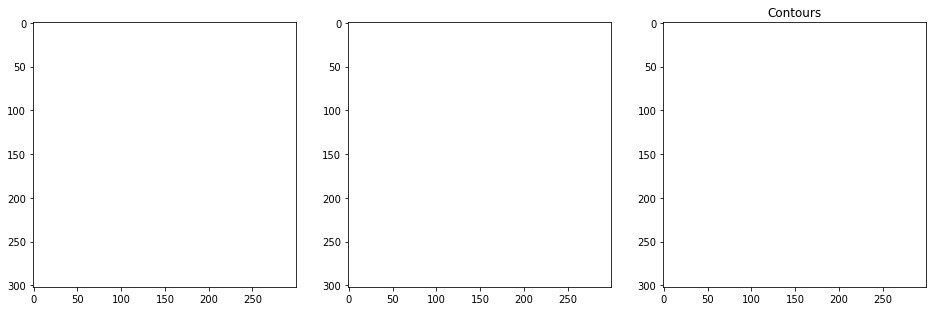

In [ ]:
list_u,list_mask_part4 = iteration_4(im,mask0,n=10)
fig, ax = plt.subplots(1, 3,figsize=(16, 6))
camera = Camera(fig)# the camera gets the fig we'll plot
for i,(phi,mask) in enumerate(zip(list_u,list_mask_part4)):
    contours = measure.find_contours(mask,0)
    ax[0].imshow(phi,cmap='jet')
    ax[1].imshow(mask,cmap='gray')
    ax[2].imshow(im,cmap='gray')
    for contour in contours:
        ax[2].plot(contour[:, 1], contour[:, 0], linewidth=1.5,color='red')
    #ax[0].set_title('Mask')
    ax[2].set_title("Contours")
    #fig.suptitle('Iteration '+str(10*(i+1)),fontsize=20)
    ax[0].text(0.7, 1.01, 'Iteration '+str(10*(i+1)), transform=ax[0].transAxes) 
    camera.snap() # the camera takes a snapshot of the plot
animation = camera.animate() # animation ready
HTML(animation.to_html5_video()) # displaying the animation 




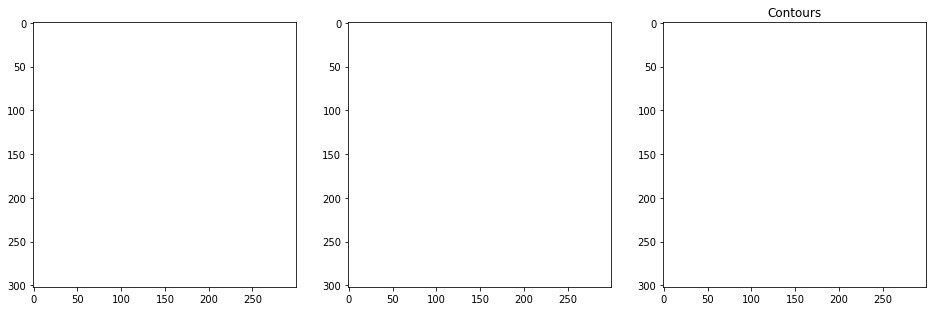

In [ ]:
list_u,list_mask_part4 = iteration_4(im,mask0,n=5)
fig, ax = plt.subplots(1, 3,figsize=(16, 6))
camera = Camera(fig)# the camera gets the fig we'll plot
for i,(phi,mask) in enumerate(zip(list_u,list_mask_part4)):
    contours = measure.find_contours(mask,0)
    ax[0].imshow(phi,cmap='jet')
    ax[1].imshow(mask,cmap='gray')
    ax[2].imshow(im,cmap='gray')
    for contour in contours:
        ax[2].plot(contour[:, 1], contour[:, 0], linewidth=1.5,color='red')
    #ax[0].set_title('Mask')
    ax[2].set_title("Contours")
    #fig.suptitle('Iteration '+str(5*(i+1)),fontsize=20)
    ax[0].text(0.7, 1.01, 'Iteration '+str(5*(i+1)), transform=ax[0].transAxes) 
    camera.snap() # the camera takes a snapshot of the plot
animation = camera.animate() # animation ready
HTML(animation.to_html5_video()) # displaying the animation 

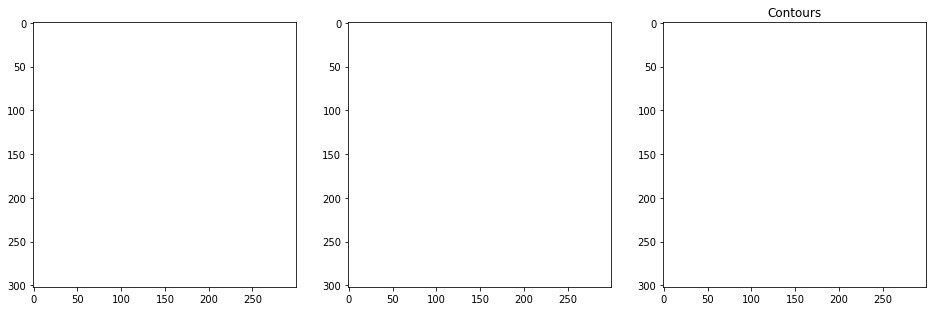

In [ ]:
list_u,list_mask1_part4 = iteration_4(im,mask2)
fig, ax = plt.subplots(1, 3,figsize=(16, 6))
camera = Camera(fig)# the camera gets the fig we'll plot
for i,(phi,mask) in enumerate(zip(list_u,list_mask_part4)):
    contours = measure.find_contours(mask,0)
    ax[0].imshow(phi,cmap='jet')
    ax[1].imshow(mask,cmap='gray')
    ax[2].imshow(im,cmap='gray')
    for contour in contours:
        ax[2].plot(contour[:, 1], contour[:, 0], linewidth=1.5,color='red')
    #ax[0].set_title('Mask')
    ax[2].set_title("Contours")
    #fig.suptitle('Iteration '+str(5*(i+1)),fontsize=20)
    ax[0].text(0.7, 1.01, 'Iteration '+str(5*(i+1)), transform=ax[0].transAxes) 
    camera.snap() # the camera takes a snapshot of the plot
animation = camera.animate() # animation ready
HTML(animation.to_html5_video()) # displaying the animation 

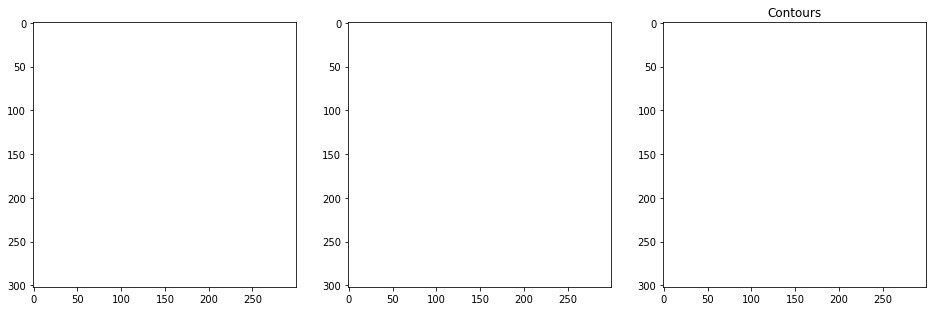

In [ ]:
list_u,list_mask_part4 = iteration_4(im,mask0,lamb=1e-3,n=10)
fig, ax = plt.subplots(1, 3,figsize=(16, 6))
camera = Camera(fig)# the camera gets the fig we'll plot
for i,(phi,mask) in enumerate(zip(list_u,list_mask_part4)):
    contours = measure.find_contours(mask,0)
    ax[0].imshow(phi,cmap='jet')
    ax[1].imshow(mask,cmap='gray')
    ax[2].imshow(im,cmap='gray')
    for contour in contours:
        ax[2].plot(contour[:, 1], contour[:, 0], linewidth=1.5,color='red')
    #ax[0].set_title('Mask')
    ax[2].set_title("Contours")
    #fig.suptitle('Iteration '+str(10*(i+1)),fontsize=20)
    ax[0].text(0.7, 1.01, 'Iteration '+str(10*(i+1)), transform=ax[0].transAxes) 
    camera.snap() # the camera takes a snapshot of the plot
animation = camera.animate() # animation ready
HTML(animation.to_html5_video()) # displaying the animation 

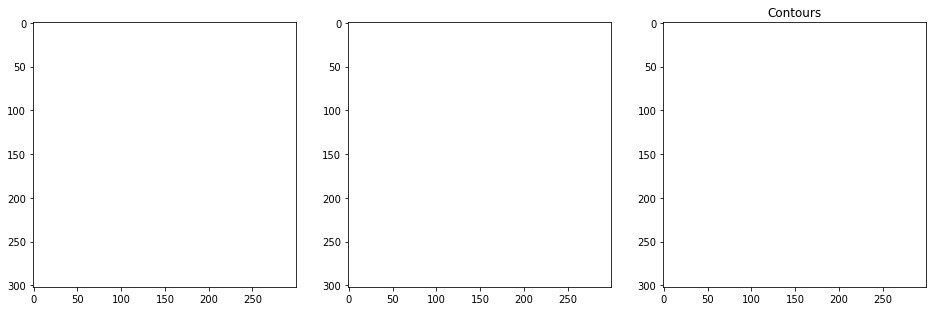

In [ ]:
phi3,list_mask3=iteration_3(im,mask0,lamb=1e-5,n=10,Nmax=1000)
fig, ax = plt.subplots(1, 3,figsize=(16, 6))
camera = Camera(fig)# the camera gets the fig we'll plot
for i,(phi,mask) in enumerate(zip(phi3,list_mask3)):
    contours = measure.find_contours(mask,0)
    ax[0].imshow(phi,cmap='jet')
    ax[1].imshow(mask,cmap='gray')
    ax[2].imshow(im,cmap='gray')
    for contour in contours:
        ax[2].plot(contour[:, 1], contour[:, 0], linewidth=1.5,color='red')
    #ax[0].set_title('Mask')
    ax[2].set_title("Contours")
    #fig.suptitle('Iteration '+str(10*(i+1)),fontsize=20)
    ax[0].text(0.7, 1.01, 'Iteration '+str(10*(i+1)), transform=ax[0].transAxes) 
    camera.snap() # the camera takes a snapshot of the plot
animation = camera.animate() # animation ready
HTML(animation.to_html5_video()) # displaying the animation 

#Accélération 
le problème est :
$$
J(u, \mathbf{z})=\int_{\Omega} u d i v(\mathbf{z}) d x+\lambda \int_{\Omega}\left|I(x)-c_{1}\right|^{2} u(x) d x+\lambda \int_{\Omega}\left|I(x)-c_{2}\right|^{2}(1-u(x)) d x .
$$
Utilisation possible de l'algorithme primale duale  de Chambolle and Pock.
$u$ la variale primale et v la variable duale.


$$
\left\{\begin{array}{l}
\mathbf{z}^{k+1}=P_{\mathcal{B}}\left(\mathbf{z}^{k}+\sigma \nabla \tilde{u}^{k}\right) \\
\left.u^{k+1}=P_{\mathcal{A}}\left(u^{k}+\tau_{(} \operatorname{div}\left(\mathbf{z}^{k+1}\right)-\lambda\left(I-c_{1}\right)^{2}+\lambda\left(I-c_{2}\right)^{2}\right)\right) \\
\tilde{u}^{k+1}=u^{k+1}+\theta\left(u^{k+1}-u^{k}\right)
\end{array}\right.
$$
